In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score, classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.cluster import KMeans, k_means
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from math import sqrt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
import pickle


np.printoptions(formatter={'float_kind':'{:3}'.format})


%matplotlib inline

In [5]:
#LOADING AND CLEANING THE DATA

In [2]:
dataset = pd.read_csv('C:\\Users\ASHE\\Desktop\\ML Project\\Bank_Loan.csv')
dataset

,ID,Age,Experience,Income(#T),ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,Four,1.6,None,0,No,Yes,No,No,Bad
1,2,45,19,34,90089,Three,1.5,Primary,0,No,Yes,No,No,Bad
2,3,39,15,11,94720,One,1.0,Primary,0,No,No,No,No,Bad
3,4,35,9,100,94112,One,2.7,Secondary,0,No,No,No,No,Bad
4,5,35,8,45,91330,Four,1.0,Secondary,0,No,No,No,No,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,One,1.9,Tertiary,0,No,No,No,Yes,Bad
4996,4997,30,4,15,92037,Four,0.4,Primary,85,No,No,No,Yes,Bad
4997,4998,63,39,24,93023,Two,0.3,Tertiary,0,No,No,No,No,Bad
4998,4999,65,40,49,90034,Three,0.5,Secondary,0,No,No,No,Yes,Bad


In [6]:
dataset.head()

,ID,Age,Experience,Income(#T),ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,Four,1.6,None,0,No,Yes,No,No,Bad
1,2,45,19,34,90089,Three,1.5,Primary,0,No,Yes,No,No,Bad
2,3,39,15,11,94720,One,1.0,Primary,0,No,No,No,No,Bad
3,4,35,9,100,94112,One,2.7,Secondary,0,No,No,No,No,Bad
4,5,35,8,45,91330,Four,1.0,Secondary,0,No,No,No,No,Good


In [7]:
dataset['CreditCard'].value_counts()

Bad     3530
Good    1470
Name: CreditCard, dtype: int64

In [8]:
dataset.info

<bound method DataFrame.info of         ID  Age  Experience  Income(#T)  ZIP Code Family  CCAvg  Education  \
0        1   25           1          49     91107   Four    1.6       None   
1        2   45          19          34     90089  Three    1.5    Primary   
2        3   39          15          11     94720    One    1.0    Primary   
3        4   35           9         100     94112    One    2.7  Secondary   
4        5   35           8          45     91330   Four    1.0  Secondary   
...    ...  ...         ...         ...       ...    ...    ...        ...   
4995  4996   29           3          40     92697    One    1.9   Tertiary   
4996  4997   30           4          15     92037   Four    0.4    Primary   
4997  4998   63          39          24     93023    Two    0.3   Tertiary   
4998  4999   65          40          49     90034  Three    0.5  Secondary   
4999  5000   28           4          83     92612  Three    0.8    Primary   

      Mortgage Personal Loan Se

In [9]:
dataset.describe()

,ID,Age,Experience,Income(#T),ZIP Code,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000


In [10]:
dataset[dataset['Online'].isnull()]

,ID,Age,Experience,Income(#T),ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [11]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income(#T)            0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
for column in dataset:
    unique_values = np.unique(dataset[column])
    no_of_values = len(unique_values)
    if no_of_values <= 10:
        print('The number of values of feature {} is: {} -- {}'.format(column, no_of_values, unique_values))
    else:
        print('The number of values of feature {} is: {}'.format(column, no_of_values))

The number of values of feature ID is: 5000
The number of values of feature Age is: 45
The number of values of feature Experience is: 47
The number of values of feature Income(#T) is: 162
The number of values of feature ZIP Code is: 467
The number of values of feature Family is: 4 -- ['Four' 'One' 'Three' 'Two']
The number of values of feature CCAvg is: 108
The number of values of feature Education is: 4 -- ['None' 'Primary' 'Secondary' 'Tertiary']
The number of values of feature Mortgage is: 347
The number of values of feature Personal Loan is: 2 -- ['No' 'Yes']
The number of values of feature Securities Account is: 2 -- ['No' 'Yes']
The number of values of feature CD Account is: 2 -- ['No' 'Yes']
The number of values of feature Online is: 2 -- ['No' 'Yes']
The number of values of feature CreditCard is: 2 -- ['Bad' 'Good']


In [13]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income(#T)', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

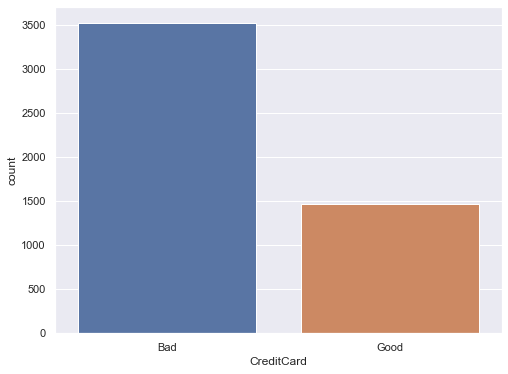

In [14]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.countplot(x = 'CreditCard', data = dataset)

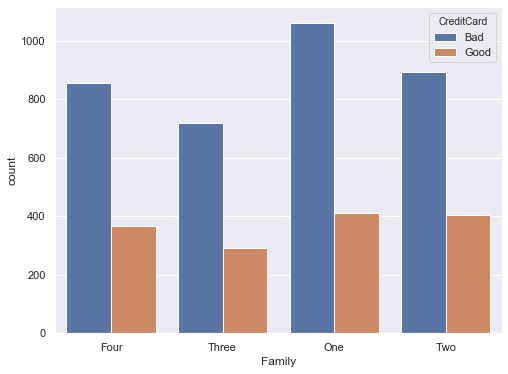

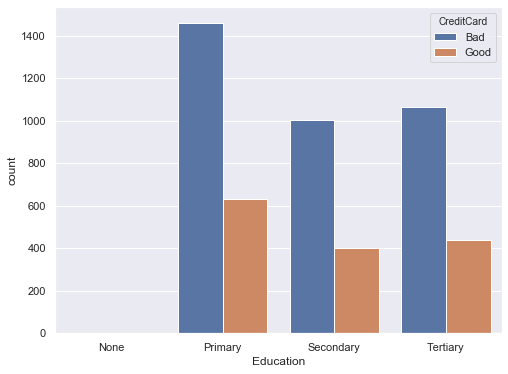

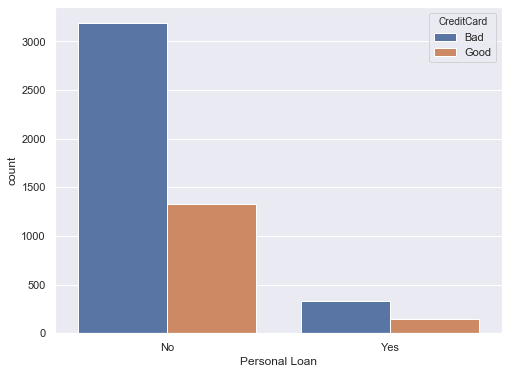

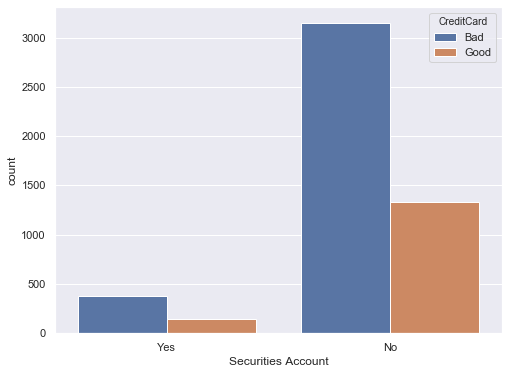

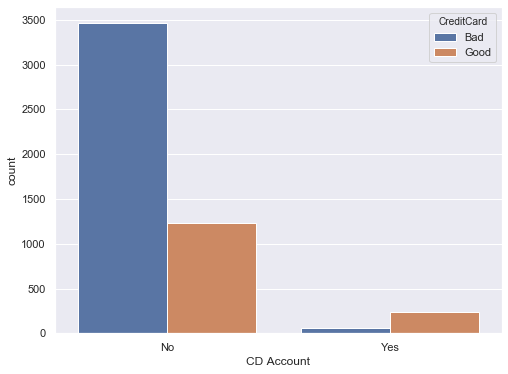

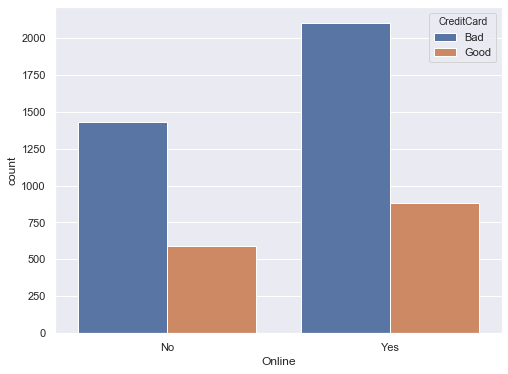

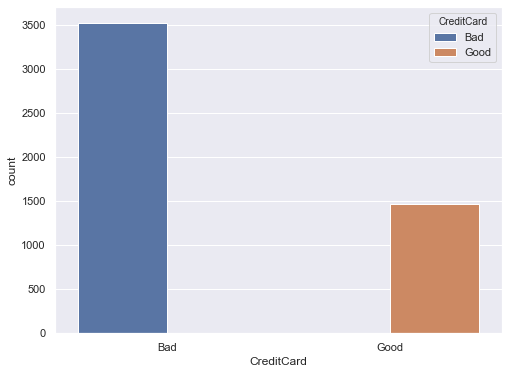

In [15]:
features = ['Family',
       'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

for f in features:
    sns.countplot(x = f, data = dataset, hue = 'CreditCard')
    plt.show()

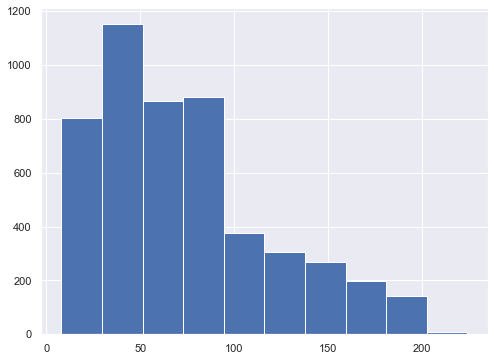

In [16]:
dataset['Income(#T)'].hist()

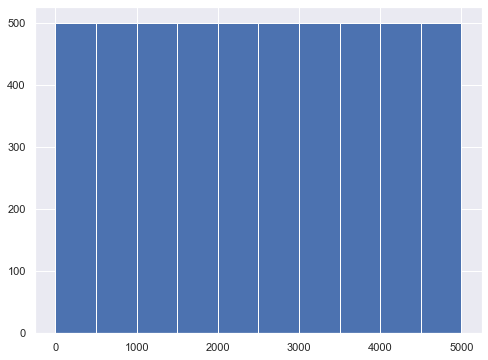

In [17]:
dataset["ID"].hist()

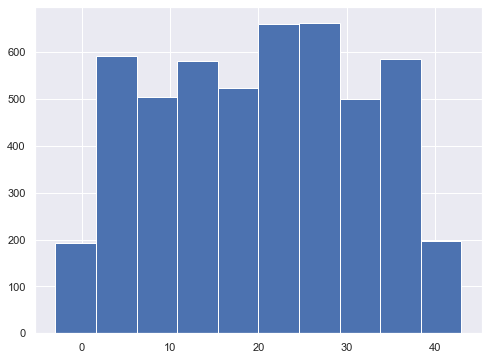

In [18]:
dataset["Experience"].hist()

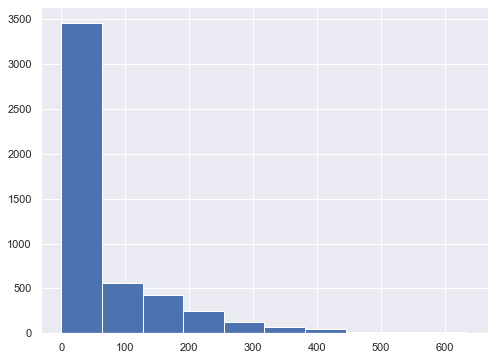

In [19]:
dataset["Mortgage"].hist()

In [20]:
dataset.corr()['Age']

ID           -0.008473
Age           1.000000
Experience    0.994215
Income(#T)   -0.055269
ZIP Code     -0.029216
CCAvg        -0.052012
Mortgage     -0.012539
Name: Age, dtype: float64

In [21]:
dataset.head()

,ID,Age,Experience,Income(#T),ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,Four,1.6,None,0,No,Yes,No,No,Bad
1,2,45,19,34,90089,Three,1.5,Primary,0,No,Yes,No,No,Bad
2,3,39,15,11,94720,One,1.0,Primary,0,No,No,No,No,Bad
3,4,35,9,100,94112,One,2.7,Secondary,0,No,No,No,No,Bad
4,5,35,8,45,91330,Four,1.0,Secondary,0,No,No,No,No,Good


In [19]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income(#T)', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

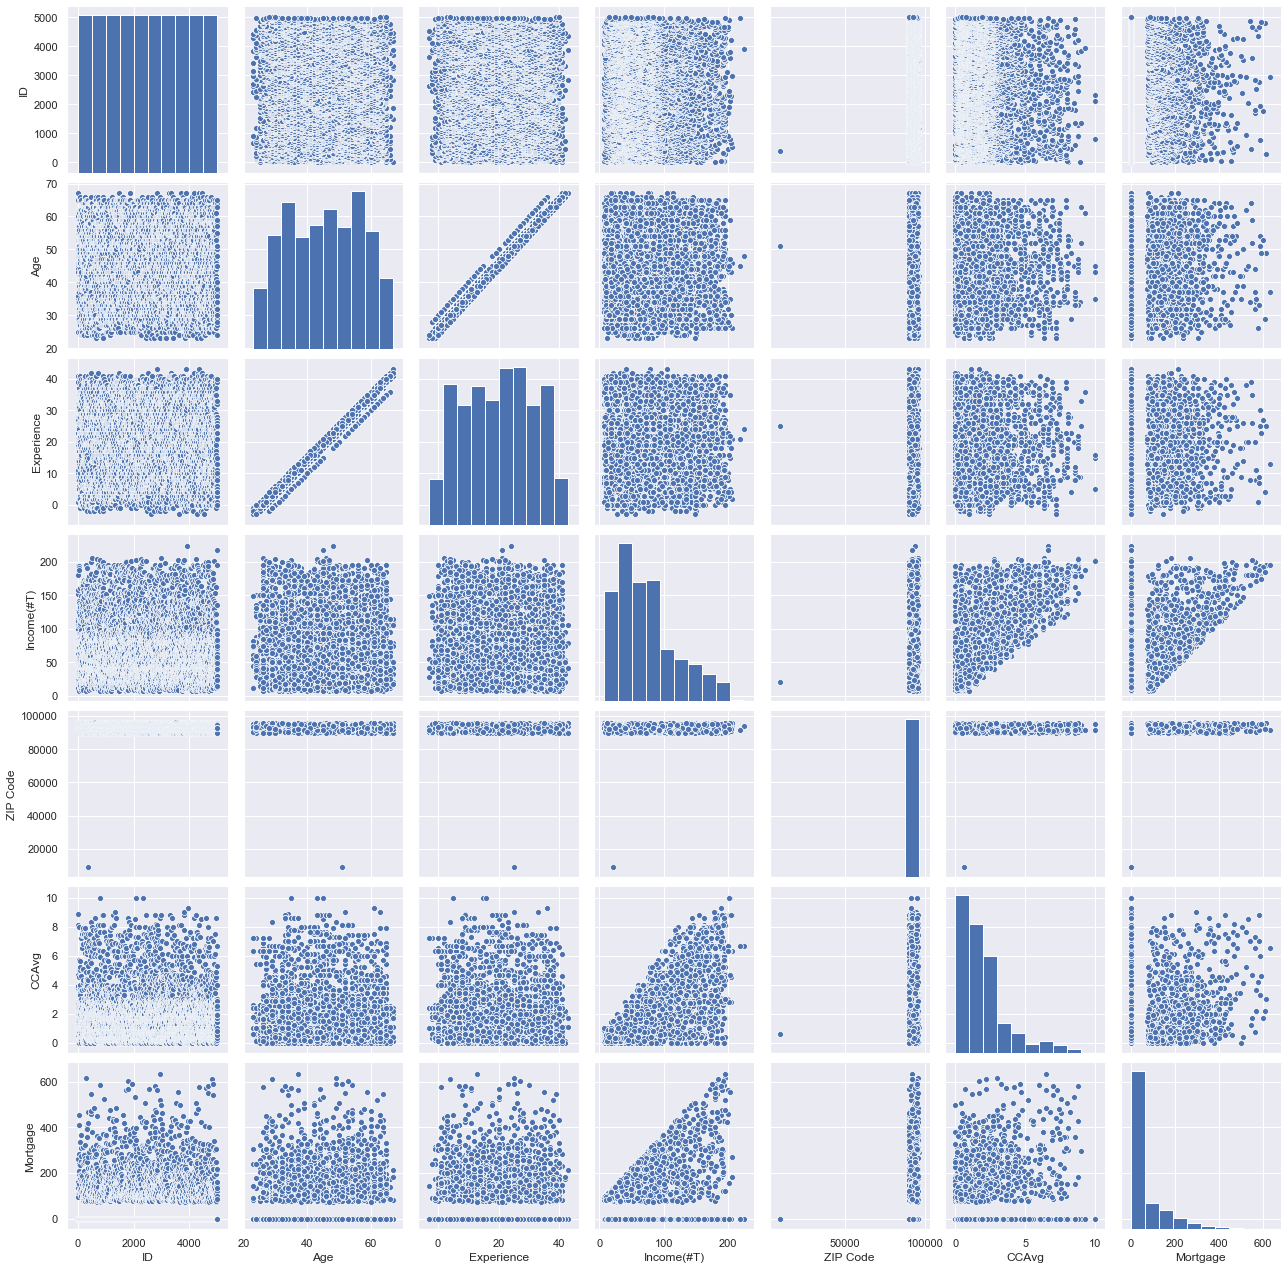

In [20]:
sns.pairplot(dataset)

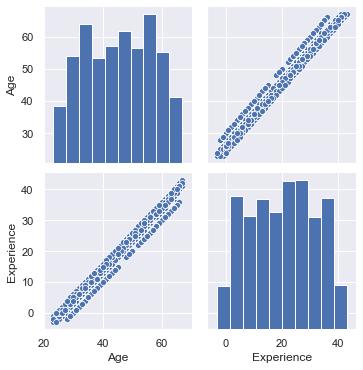

In [21]:
sns.pairplot(dataset[['Age', 'Experience']])

In [22]:
new_dataset = dataset[['Age', 'Experience', 'Income(#T)', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

In [23]:
new_dataset

,Age,Experience,Income(#T),Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,Four,1.6,None,0,No,Yes,No,No,Bad
1,45,19,34,Three,1.5,Primary,0,No,Yes,No,No,Bad
2,39,15,11,One,1.0,Primary,0,No,No,No,No,Bad
3,35,9,100,One,2.7,Secondary,0,No,No,No,No,Bad
4,35,8,45,Four,1.0,Secondary,0,No,No,No,No,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,One,1.9,Tertiary,0,No,No,No,Yes,Bad
4996,30,4,15,Four,0.4,Primary,85,No,No,No,Yes,Bad
4997,63,39,24,Two,0.3,Tertiary,0,No,No,No,No,Bad
4998,65,40,49,Three,0.5,Secondary,0,No,No,No,Yes,Bad


In [24]:
new_dataset.columns

Index(['Age', 'Experience', 'Income(#T)', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [22]:
#FEATURE SELECTION

In [25]:
new_dataset = new_dataset.drop('Mortgage', axis = 1)

In [26]:
new_dataset['CreditCard'][new_dataset['CreditCard'] == 'Bad'] = 0
new_dataset['CreditCard'][new_dataset['CreditCard'] == 'Good'] = 1

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
new_dataset

,Age,Experience,Income(#T),Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,Four,1.6,None,No,Yes,No,No,0
1,45,19,34,Three,1.5,Primary,No,Yes,No,No,0
2,39,15,11,One,1.0,Primary,No,No,No,No,0
3,35,9,100,One,2.7,Secondary,No,No,No,No,0
4,35,8,45,Four,1.0,Secondary,No,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,One,1.9,Tertiary,No,No,No,Yes,0
4996,30,4,15,Four,0.4,Primary,No,No,No,Yes,0
4997,63,39,24,Two,0.3,Tertiary,No,No,No,No,0
4998,65,40,49,Three,0.5,Secondary,No,No,No,Yes,0


In [28]:
new_dataset = pd.get_dummies(new_dataset, columns = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online'])

In [29]:
new_dataset

,Age,Experience,Income(#T),CCAvg,CreditCard,Family_Four,Family_One,Family_Three,Family_Two,Education_None,...,Education_Secondary,Education_Tertiary,Personal Loan_No,Personal Loan_Yes,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online_No,Online_Yes
0,25,1,49,1.6,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,1,0
1,45,19,34,1.5,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
2,39,15,11,1.0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,9,100,2.7,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,8,45,1.0,1,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,0,1
4996,30,4,15,0.4,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
4997,63,39,24,0.3,0,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
4998,65,40,49,0.5,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1


In [30]:
X = new_dataset.drop('CreditCard', axis = 1).values
y = new_dataset['CreditCard']


new_dataset['CreditCard'][new_dataset['CreditCard'] == 'Bad'] = 0
new_dataset['CreditCard'][new_dataset['CreditCard'] == 'Good'] = 1

y = y.astype(int)

C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ASHE\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
X.shape, y.shape

((5000, 20), (5000,))

In [32]:
dt = DecisionTreeClassifier(random_state =15, criterion = 'entropy', max_depth = 10)
dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [33]:
col = []
col_fi = []

for i, column in enumerate(new_dataset.drop('CreditCard', axis = 1)):
    print('The number of value importances of feature {}: {:.3f}'.format(column, dt.feature_importances_[i]))
    col.append(column)
    col_fi.append(dt.feature_importances_[i])

The number of value importances of feature Age: 0.105
The number of value importances of feature Experience: 0.106
The number of value importances of feature Income(#T): 0.138
The number of value importances of feature CCAvg: 0.080
The number of value importances of feature Family_Four: 0.020
The number of value importances of feature Family_One: 0.003
The number of value importances of feature Family_Three: 0.014
The number of value importances of feature Family_Two: 0.013
The number of value importances of feature Education_None: 0.000
The number of value importances of feature Education_Primary: 0.011
The number of value importances of feature Education_Secondary: 0.009
The number of value importances of feature Education_Tertiary: 0.006
The number of value importances of feature Personal Loan_No: 0.065
The number of value importances of feature Personal Loan_Yes: 0.000
The number of value importances of feature Securities Account_No: 0.022
The number of value importances of feature

In [34]:
col_data = zip(col, col_fi)
col_df = pd.DataFrame(col_data, columns = ['Features', 'Feature Importances'])
col_df = col_df.sort_values(by = 'Feature Importances', ascending = False).reset_index()
col_df

,index,Features,Feature Importances
0,16,CD Account_No,0.250864
1,2,Income(#T),0.138107
2,1,Experience,0.106037
3,0,Age,0.104939
4,3,CCAvg,0.079601
5,12,Personal Loan_No,0.064599
6,19,Online_Yes,0.064403
7,18,Online_No,0.057633
8,15,Securities Account_Yes,0.035394
9,14,Securities Account_No,0.021743


In [35]:
#Since there are some features with zero importances, we delete them from the dataset

In [36]:
columns_retained = col_df['Features'][0:17]

In [37]:
columns_retained.sort_values()

3                        Age
4                      CCAvg
0              CD Account_No
13         Education_Primary
14       Education_Secondary
15        Education_Tertiary
2                 Experience
10               Family_Four
16                Family_One
11              Family_Three
12                Family_Two
1                 Income(#T)
7                  Online_No
6                 Online_Yes
5           Personal Loan_No
9      Securities Account_No
8     Securities Account_Yes
Name: Features, dtype: object

In [38]:
new_dataset[columns_retained]

,CD Account_No,Income(#T),Experience,Age,CCAvg,Personal Loan_No,Online_Yes,Online_No,Securities Account_Yes,Securities Account_No,Family_Four,Family_Three,Family_Two,Education_Primary,Education_Secondary,Education_Tertiary,Family_One
0,1,49,1,25,1.6,1,0,1,1,0,1,0,0,0,0,0,0
1,1,34,19,45,1.5,1,0,1,1,0,0,1,0,1,0,0,0
2,1,11,15,39,1.0,1,0,1,0,1,0,0,0,1,0,0,1
3,1,100,9,35,2.7,1,0,1,0,1,0,0,0,0,1,0,1
4,1,45,8,35,1.0,1,0,1,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,40,3,29,1.9,1,1,0,0,1,0,0,0,0,0,1,1
4996,1,15,4,30,0.4,1,1,0,0,1,1,0,0,1,0,0,0
4997,1,24,39,63,0.3,1,0,1,0,1,0,0,1,0,0,1,0
4998,1,49,40,65,0.5,1,1,0,0,1,0,1,0,0,1,0,0


In [39]:
X = new_dataset[columns_retained]
y = new_dataset['CreditCard']

y = y.astype(int)



In [40]:
#We'll consider all the variables as all features have some semblance of importance, and the dataset is relatively small

In [41]:
X.shape, y.shape

((5000, 17), (5000,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.20, random_state = 15)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size = 0.10, random_state = 15)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print('')
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(3600, 17)
(1000, 17)
(400, 17)

(3600,)
(1000,)
(400,)


In [23]:
#RUNNING LOGISTIC REGRESSION

In [44]:
lm=CatBoostClassifier(n_estimators=800,eval_metric='AUC',max_depth=5,learning_rate=0.1,od_wait=50, 
                              subsample=0.9,bootstrap_type='Bernoulli',metric_period=20,
                     use_best_model=True)

In [45]:
lm = LogisticRegression(random_state = 15, solver = 'lbfgs', max_iter = 8000)
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=8000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=15, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred =lm.predict(X_train)
y_pred_t = lm.predict(X_test)
pred_proba = lm.predict_proba(X_train)
pred_proba_t = lm.predict_proba(X_test)

In [47]:
print('The CA of the training set is:', lm.score(X_train, y_train))
print('The CA of the training set is:', r2_score(y_train, y_pred))
print('')
print('The CA of the testing set is:', lm.score(X_test, y_test))
print('')
print('The Log Loss of the training set is:', log_loss(y_train, pred_proba))
print('The Log Loss of the testing set is:', log_loss(y_test, pred_proba_t))
print('')
print('The classification report:', classification_report(y_train, y_pred))

The CA of the training set is: 0.7358333333333333
The CA of the training set is: -0.26128482615703463

The CA of the testing set is: 0.747

The Log Loss of the training set is: 0.5616535103767192
The Log Loss of the testing set is: 0.5539675862991675

The classification report:               precision    recall  f1-score   support

           0       0.73      0.98      0.84      2525
           1       0.79      0.16      0.26      1075

    accuracy                           0.74      3600
   macro avg       0.76      0.57      0.55      3600
weighted avg       0.75      0.74      0.67      3600



In [48]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))
Counter(y_valid)

Counter({0: 2525, 1: 1075})
Counter({0: 703, 1: 297})


Counter({0: 302, 1: 98})

In [49]:
np.unique(y_pred), np.unique(y_train)

(array([0, 1]), array([0, 1]))

In [50]:
np.array(y_pred)

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
def plot_confusion_matrix(cm, classes = None, title = 'Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, vmin = 0., vmax = 1., annot = True, annot_kws = {'size':15}, xticklabels = classes, yticklabels = classes)
    else:
         sns.heatmap(cm, vmin = 0., vmax = 1.)
    plt.title(title)
    plt.show

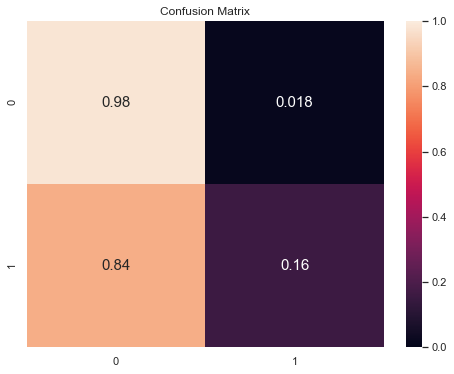

In [52]:
cm = confusion_matrix(y_train, y_pred)
c_norm = cm/cm.sum(axis = 1).reshape(-1,1)

plot_confusion_matrix(c_norm, classes = lm.classes_, title = 'Confusion Matrix')

In [53]:
False_Positive = cm.sum(axis = 0) - np.diag(cm)
False_Negative = cm.sum(axis = 1) - np.diag(cm)
True_Positive = np.diag(cm)
True_Negative = cm.sum() - (False_Positive + False_Negative + True_Positive)

print(False_Positive)
print(False_Negative)
print(True_Positive)
print(True_Negative)
print('')
print('The precision rate is:', True_Positive/(True_Positive + False_Positive))

[906  45]
[ 45 906]
[2480  169]
[ 169 2480]

The precision rate is: [0.73242764 0.78971963]


In [24]:
#Now we move on to Hyperparameter Tuning


In [63]:
Tuning_List = np.geomspace(1e-5, 1e5, num = 20)
Tuning_List

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

In [64]:
Tuning_List = np.geomspace(1e-5, 1e5, num = 20)
CA = []
Logarithmic_loss = []

for c in Tuning_List:
    lm2 = LogisticRegression(random_state = 15, solver = 'lbfgs', C = c)
    lm2.fit(X_train, y_train)
    score = lm2.score(X_test, y_test)
    CA.append(score)
    print('The accuracy of feature {} is: {}'.format(c, score))
    pred_proba_t = lm2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_loss.append(log_loss2)
    print('The Log Loss of feature {} is: {}'.format(c, log_loss2))
    print('')


The accuracy of feature 1e-05 is: 0.703
The Log Loss of feature 1e-05 is: 0.6081685202459195

The accuracy of feature 3.359818286283781e-05 is: 0.703
The Log Loss of feature 3.359818286283781e-05 is: 0.608064632379617

The accuracy of feature 0.00011288378916846884 is: 0.703
The Log Loss of feature 0.00011288378916846884 is: 0.6078029139831967

The accuracy of feature 0.000379269019073225 is: 0.703
The Log Loss of feature 0.000379269019073225 is: 0.6069705793910052

The accuracy of feature 0.0012742749857031334 is: 0.703
The Log Loss of feature 0.0012742749857031334 is: 0.604367511683218



C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

The accuracy of feature 0.004281332398719391 is: 0.703
The Log Loss of feature 0.004281332398719391 is: 0.5970808960783117

The accuracy of feature 0.01438449888287663 is: 0.712
The Log Loss of feature 0.01438449888287663 is: 0.5823735497281212

The accuracy of feature 0.04832930238571752 is: 0.748
The Log Loss of feature 0.04832930238571752 is: 0.566552796331572



C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

The accuracy of feature 0.1623776739188721 is: 0.747
The Log Loss of feature 0.1623776739188721 is: 0.5574320380482898

The accuracy of feature 0.5455594781168515 is: 0.747
The Log Loss of feature 0.5455594781168515 is: 0.5541476303626705

The accuracy of feature 1.8329807108324339 is: 0.746
The Log Loss of feature 1.8329807108324339 is: 0.5537274090224807

The accuracy of feature 6.1584821106602545 is: 0.748
The Log Loss of feature 6.1584821106602545 is: 0.5542283606571257



C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

The accuracy of feature 20.6913808111479 is: 0.748
The Log Loss of feature 20.6913808111479 is: 0.5522388004431869

The accuracy of feature 69.51927961775606 is: 0.747
The Log Loss of feature 69.51927961775606 is: 0.553433845469342

The accuracy of feature 233.57214690901213 is: 0.747
The Log Loss of feature 233.57214690901213 is: 0.5536903472533617

The accuracy of feature 784.7599703514607 is: 0.747
The Log Loss of feature 784.7599703514607 is: 0.5534636252212721

The accuracy of feature 2636.6508987303555 is: 0.746
The Log Loss of feature 2636.6508987303555 is: 0.5534393403815107

The accuracy of feature 8858.667904100832 is: 0.747
The Log Loss of feature 8858.667904100832 is: 0.5520091501208545



C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

The accuracy of feature 29763.51441631313 is: 0.748
The Log Loss of feature 29763.51441631313 is: 0.5527124966867766

The accuracy of feature 100000.0 is: 0.747
The Log Loss of feature 100000.0 is: 0.5535057572250902



C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
Coldish = zip(Tuning_List, CA, Logarithmic_loss)
col_dff = pd.DataFrame(Coldish, columns = ['Tuning_List', 'CA', 'Log_loss'])
col_dff.sort_values(by = 'Log_loss', ascending = True).reset_index()

,index,Tuning_List,CA,Log_loss
0,17,8858.667904,0.747,0.552009
1,12,20.691381,0.748,0.552239
2,18,29763.514416,0.748,0.552712
3,13,69.519280,0.747,0.553434
4,16,2636.650899,0.746,0.553439
5,15,784.759970,0.747,0.553464
6,19,100000.000000,0.747,0.553506
7,14,233.572147,0.747,0.553690
8,10,1.832981,0.746,0.553727
9,9,0.545559,0.747,0.554148


In [68]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV

kf = KFold(n_splits = 3, random_state = 0, shuffle = True)

lm3 = LogisticRegressionCV(cv = kf, random_state = 15, solver = 'lbfgs', Cs = C_List)
lm3.fit(X_train, y_train)
score = lm3.score(X_test, y_test)
print('The classification accuracy is', score)
pred_proba_t = lm3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
Logarithmic_loss.append(log_loss3)
print('The Log Loss is', log_loss3)
print('')
print('The optimal Tuning List parameter is:', lm3.C_)


C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

The classification accuracy is 0.747
The Log Loss is 0.5576600178308343

The optimal Tuning List parameter is: [0.16237767]


C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [ ]:
RUNNING KFOLD VALIDATION


In [69]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV

kf = KFold(n_splits = 3, random_state = 0, shuffle = True)

lm3 = LogisticRegressionCV(cv = kf, random_state = 15, solver = 'lbfgs', Cs = C_List, max_iter = 8000)
lm3.fit(X_train, y_train)
score = lm3.score(X_test, y_test)
print('The classification accuracy is', score)
pred_proba_t = lm3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
Logarithmic_loss.append(log_loss3)
print('The Log Loss is', log_loss3)
print('')
print('The optimal Tuning List parameter is:', lm3.C_)


The classification accuracy is 0.748
The Log Loss is 0.5666198474654255

The optimal Tuning List parameter is: [0.0483293]


The accuracy of feature 1e-05 is: 0.703
The Log Loss of feature 1e-05 is: 0.6081685202459195



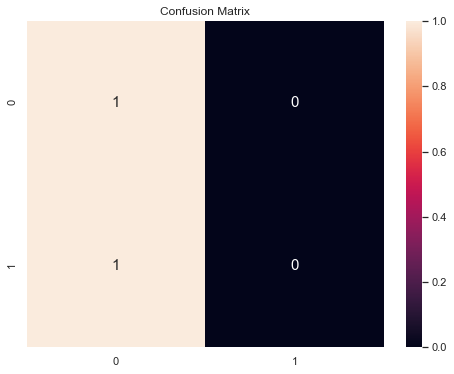

The accuracy of feature 3.359818286283781e-05 is: 0.703
The Log Loss of feature 3.359818286283781e-05 is: 0.608064632379617



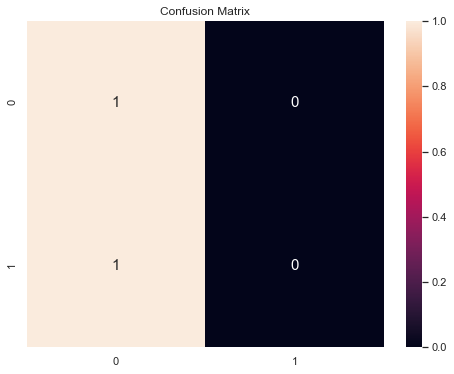

The accuracy of feature 0.00011288378916846884 is: 0.703
The Log Loss of feature 0.00011288378916846884 is: 0.6078029139831967



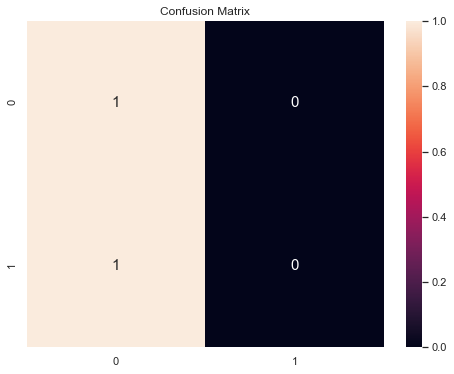

The accuracy of feature 0.000379269019073225 is: 0.703
The Log Loss of feature 0.000379269019073225 is: 0.6069705793910052



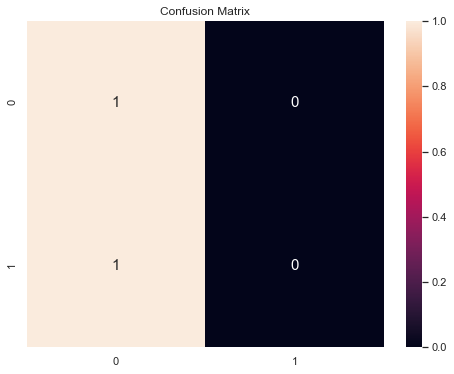

The accuracy of feature 0.0012742749857031334 is: 0.703
The Log Loss of feature 0.0012742749857031334 is: 0.6043474406005062



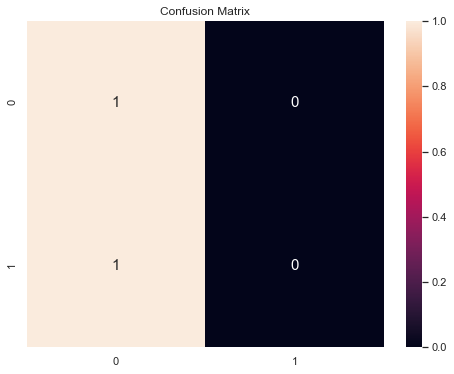

The accuracy of feature 0.004281332398719391 is: 0.703
The Log Loss of feature 0.004281332398719391 is: 0.5970288252178964



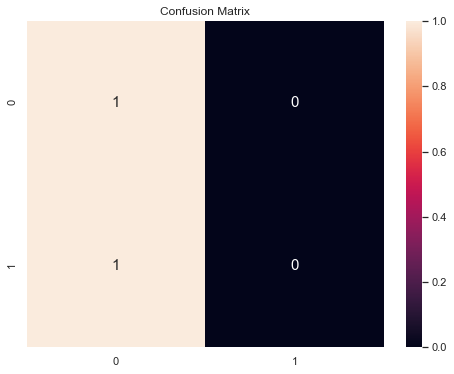

The accuracy of feature 0.01438449888287663 is: 0.713
The Log Loss of feature 0.01438449888287663 is: 0.5822874466326187



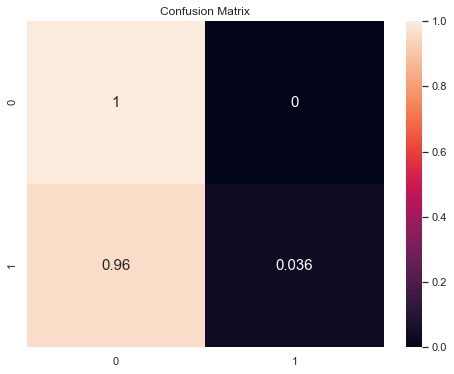

The accuracy of feature 0.04832930238571752 is: 0.748
The Log Loss of feature 0.04832930238571752 is: 0.5666056779763154



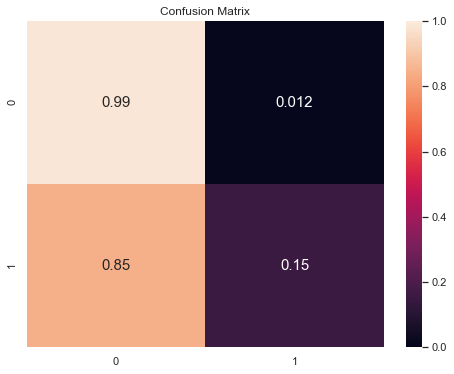

The accuracy of feature 0.1623776739188721 is: 0.747
The Log Loss of feature 0.1623776739188721 is: 0.5576813249656388



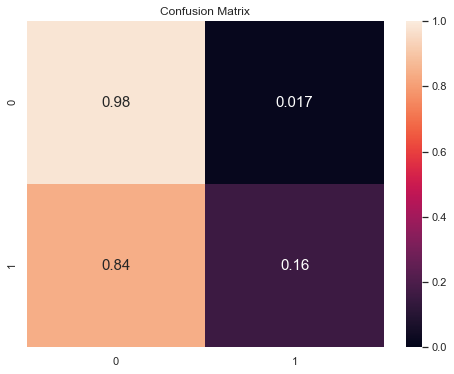

The accuracy of feature 0.5455594781168515 is: 0.748
The Log Loss of feature 0.5455594781168515 is: 0.5545650027474056



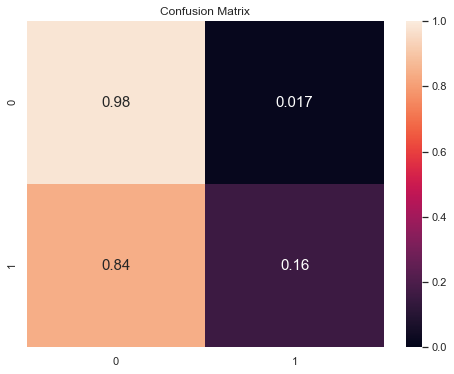

The accuracy of feature 1.8329807108324339 is: 0.747
The Log Loss of feature 1.8329807108324339 is: 0.5535707328478217



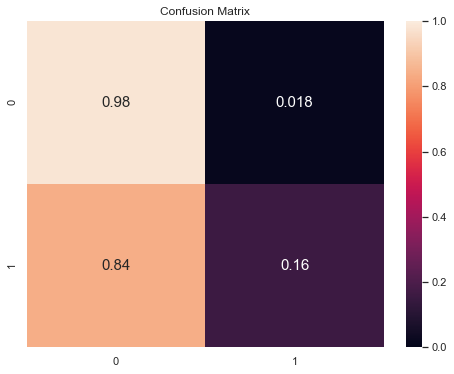

The accuracy of feature 6.1584821106602545 is: 0.746
The Log Loss of feature 6.1584821106602545 is: 0.5532027779009222



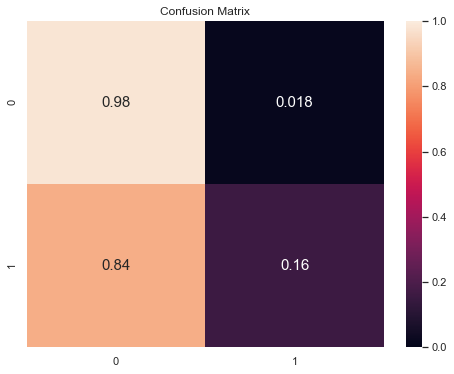

The accuracy of feature 20.6913808111479 is: 0.746
The Log Loss of feature 20.6913808111479 is: 0.5531498846604711



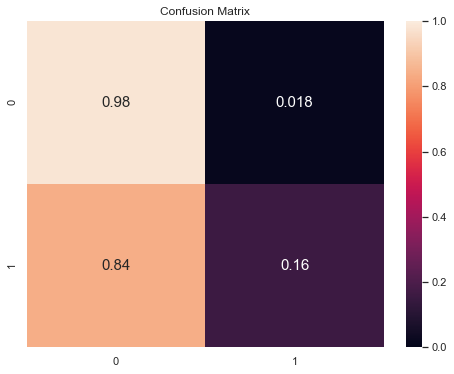

The accuracy of feature 69.51927961775606 is: 0.746
The Log Loss of feature 69.51927961775606 is: 0.553122935306789



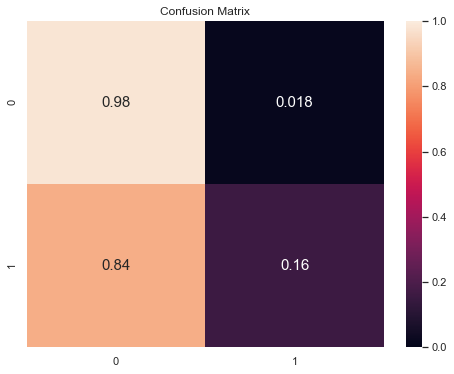

The accuracy of feature 233.57214690901213 is: 0.746
The Log Loss of feature 233.57214690901213 is: 0.5531609523246421



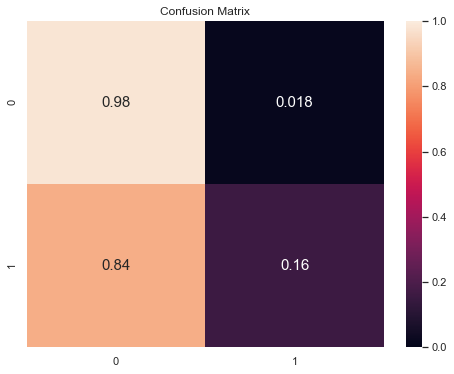

The accuracy of feature 784.7599703514607 is: 0.746
The Log Loss of feature 784.7599703514607 is: 0.5531644260553593



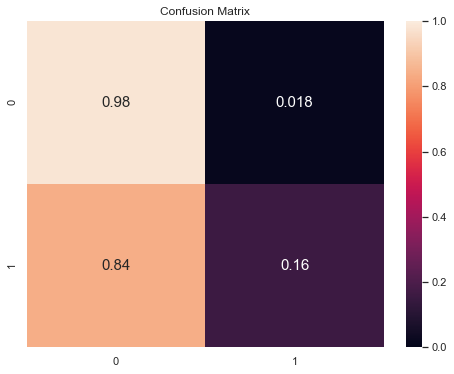

The accuracy of feature 2636.6508987303555 is: 0.746
The Log Loss of feature 2636.6508987303555 is: 0.5532050014585659



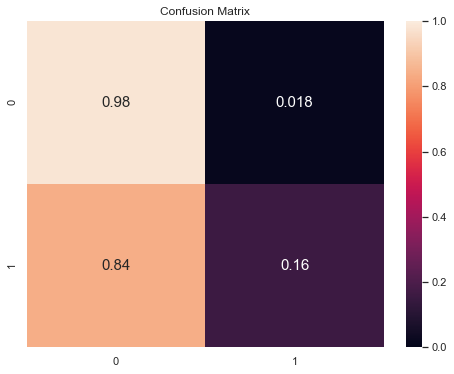

The accuracy of feature 8858.667904100832 is: 0.746
The Log Loss of feature 8858.667904100832 is: 0.5531216846866496



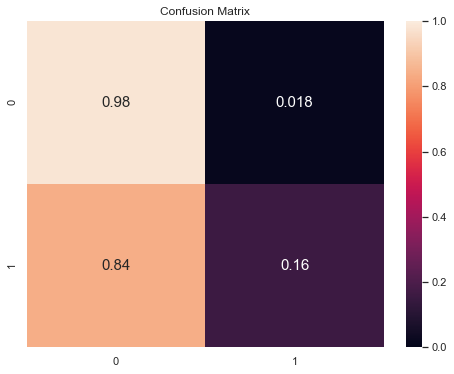

The accuracy of feature 29763.51441631313 is: 0.746
The Log Loss of feature 29763.51441631313 is: 0.5531427506152938



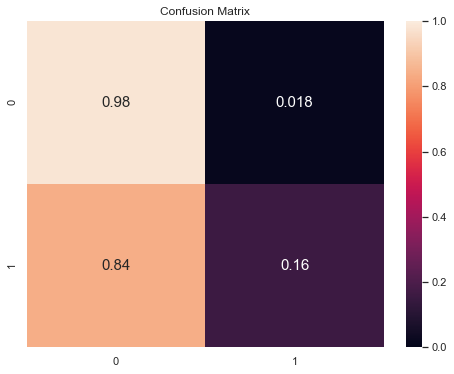

The accuracy of feature 100000.0 is: 0.747
The Log Loss of feature 100000.0 is: 0.553157008945064



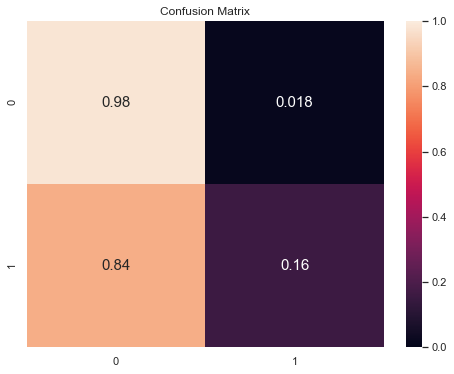

In [73]:
Tuning_List = np.geomspace(1e-5, 1e5, num = 20)
CA = []
Logarithmic_loss = []

for c in Tuning_List:
    lm2 = LogisticRegression(random_state = 15, solver = 'lbfgs', C = c, max_iter = 8000)
    lm2.fit(X_train, y_train)
    score = lm2.score(X_test, y_test)
    CA.append(score)
    print('The accuracy of feature {} is: {}'.format(c, score))
    pred_proba_t = lm2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_loss.append(log_loss2)
    print('The Log Loss of feature {} is: {}'.format(c, log_loss2))
    print('')
    y_pred = lm2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    c_norm = cm/cm.sum(axis = 1).reshape(-1,1)
    plot_confusion_matrix(c_norm, classes = lm.classes_, title = 'Confusion Matrix')
    plt.show()


In [74]:
from sklearn.dummy import DummyClassifier
dummyclf = DummyClassifier(strategy = 'most_frequent')
dummyclf.fit(X_train, y_train)
score = dummyclf.score(X_test, y_test)
print('The classification accuracy is', score)
pred_proba_t = dummyclf.predict_proba(X_test)
log_loss4 = log_loss(y_test, pred_proba_t)
print('The Log Loss is', log_loss4)
print('')
print('The optimal C parameter is:', lm3.C_)

The classification accuracy is 0.703
The Log Loss is 10.258016589288472

The optimal C parameter is: [0.0483293]


In [ ]:
#Using the C parameter that gives the minimum log_loss: 8858.667904, ignoring that of the Dummy Classifier and KFOLD

In [79]:
Optimal_Parameter = LogisticRegression(random_state = 15, solver = 'lbfgs', C = 8858.667904, max_iter = 20000)
Optimal_Parameter.fit(X_train, y_train)
score = Optimal_Parameter.score(X_test, y_test)
print('The classification accuracy is', score)
pred_proba_t = Optimal_Parameter.predict_proba(X_test)
log_loss7 = log_loss(y_test, pred_proba_t)
print('The Log Loss is', log_loss7)

The classification accuracy is 0.746
The Log Loss is 0.5530982853441342
